![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Computer Vision - Lecture 3</a>


## Inference with Pre-trained ResNet Model

In this notebook, we use pre-trained [ResNet](https://d2l.ai/chapter_convolutional-modern/resnet.html) with only a few lines of code.

1. <a href="#1">Downloading a Pretrained Model</a>      
2. <a href="#2">Preprocessing an Image</a>
3. <a href="#3">Using ResNet50 for Inference</a>
    

In [1]:
! pip install -q -r ../requirements.txt

Let's import the necessary libraries:

In [2]:
%matplotlib inline
from gluoncv import model_zoo
from gluoncv.data.transforms.presets.imagenet import transform_eval
from gluoncv.utils.viz.image import plot_image
from matplotlib import pyplot as plt
from mxnet import nd, image

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.9.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


## 1. <a name="1">Downloading a Pretrained Model</a>
(<a href="#0">Go to top</a>)

With GluonCV, we will start with a ResNet 50 neural net trained on ImageNet dataset as our base model. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to [GluonCV Model Zoo](https://gluon-cv.mxnet.io/model_zoo/index.html).

In [3]:
net = model_zoo.get_model('ResNet50_v1', pretrained=True)

100%|██████████| 57421/57421 [00:01<00:00, 39259.95KB/s]


## 2. <a name="2">Pre-processing an Image</a>
(<a href="#0">Go to top</a>)

Next we read a sample image, and pre-process it with preset data transforms `transform_eval`.

<AxesSubplot:>

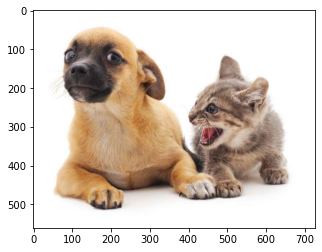

In [4]:
img_raw = image.imread('../data/catdog.png')
img = transform_eval(img_raw)
plot_image(img_raw)

## 3. <a name="3">Inference Using ResNet50</a>
(<a href="#0">Go to top</a>)

Now let's generate the predictions from the pretrained ResNet50.
`pred` will be a list of ndarray, where each ndarray is of length 1000.
Each number of this 1000-length ndarray can be applied `softmax` to 
represent the prediction confidence towards each of the [subject classes in ImageNet](http://image-net.org/explore).

In [5]:
pred = net(img)
len(pred[0])

1000

The access all the existing classes of ImageNet, we can use `net.classes`. Let's take a look of the first 5 classes!

In [6]:
classes = net.classes
classes[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

Now let's see how does the model think of our input test image?!

In [7]:
topK = 5
ind = nd.topk(pred, k=topK)[0].astype('int')
print('The input picture is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%
          (classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))

The input picture is classified to be
	[Chihuahua], with probability 0.451.
	[Brabancon griffon], with probability 0.035.
	[bull mastiff], with probability 0.016.
	[Rhodesian ridgeback], with probability 0.010.
	[Border terrier], with probability 0.008.


Feel free to download and try other ResNet versions (ResNet18, ResNet101, ResNet152, etc.) in your own experiment. What is more, try to fineture on other datasets to see if you can improve the model performance.